In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [223]:
df = pd.read_excel('ngt_ngt_300_fr4_do60_epochs200_ndcgs_1.xlsx')
# df = pd.read_excel('ngt_ngt_300_per_aspect_loss_1000epochs_do60_train_augm.xlsx')
# df = pd.read_excel('ngt_ngt_300_fr4_do10_epochs1000_simlabel_noaugs.xlsx')
# df = pd.read_excel('ngt_ngt_300_per_aspect_loss_1000epochs_do60_train_augm_p@k.xlsx')

STEP = 100

N_EPOCHS = df.shape[0]
TOKS = [1, 5, 10, 20]

In [224]:
pd.options.display.max_columns = 99
display(df.head())

,epoch,train_prec@1,train_prec@5,train_prec@10,train_prec@20,train_NDCG@1,train_NDCG@5,train_NDCG@10,train_NDCG@20,train_location_p@1,train_location_p@5,train_location_p@10,train_location_p@20,train_movement_p@1,train_movement_p@5,train_movement_p@10,train_movement_p@20,train_handedness_NDCG@1,train_handedness_NDCG@5,train_handedness_NDCG@10,train_handedness_NDCG@20,train_location_NDCG@1,train_location_NDCG@5,train_location_NDCG@10,train_location_NDCG@20,train_movement_NDCG@1,train_movement_NDCG@5,train_movement_NDCG@10,train_movement_NDCG@20,train_strong_hand_NDCG@1,train_strong_hand_NDCG@5,train_strong_hand_NDCG@10,train_strong_hand_NDCG@20,train_weak_hand_NDCG@1,train_weak_hand_NDCG@5,train_weak_hand_NDCG@10,train_weak_hand_NDCG@20,train_loss,val_prec@1,val_prec@5,val_prec@10,val_prec@20,val_NDCG@1,val_NDCG@5,val_NDCG@10,val_NDCG@20,val_location_p@1,val_location_p@5,val_location_p@10,val_location_p@20,val_movement_p@1,val_movement_p@5,val_movement_p@10,val_movement_p@20,val_handedness_NDCG@1,val_handedness_NDCG@5,val_handedness_NDCG@10,val_handedness_NDCG@20,val_location_NDCG@1,val_location_NDCG@5,val_location_NDCG@10,val_location_NDCG@20,val_movement_NDCG@1,val_movement_NDCG@5,val_movement_NDCG@10,val_movement_NDCG@20,val_strong_hand_NDCG@1,val_strong_hand_NDCG@5,val_strong_hand_NDCG@10,val_strong_hand_NDCG@20,val_weak_hand_NDCG@1,val_weak_hand_NDCG@5,val_weak_hand_NDCG@10,val_weak_hand_NDCG@20,val_loss
0,1,0.333333,0.666667,2.000000,6.666667,0.402920,0.422131,0.444303,0.468921,18.714046,19.307124,18.705522,18.980315,27.000000,30.333333,29.980952,30.426611,0.450199,0.450604,0.450862,0.451076,0.555740,0.564731,0.572312,0.582275,0.289330,0.292234,0.295949,0.303874,0.216751,0.218277,0.220924,0.229682,0.234679,0.236362,0.238295,0.242530,6.045617,0.0,0.0,2.0,4.0,0.392644,0.431226,0.454403,0.475729,18.161290,20.019355,19.612366,19.915591,27.0,28.4,29.4,29.540336,0.467854,0.467854,0.467854,0.467854,0.547757,0.557725,0.571410,0.585840,0.290127,0.290523,0.293865,0.304744,0.206733,0.212952,0.218225,0.227453,0.226513,0.227549,0.228793,0.233913,5.728772
1,2,0.000000,1.333333,2.000000,4.333334,0.394451,0.434191,0.449860,0.474518,17.847782,18.380892,19.762030,20.080533,27.666667,30.066667,30.166667,30.217227,0.454241,0.454440,0.454567,0.454672,0.562039,0.568191,0.576019,0.586477,0.286230,0.289228,0.291684,0.300819,0.216798,0.218597,0.222116,0.230396,0.233373,0.235396,0.237427,0.242158,5.735028,0.0,0.0,1.0,3.0,0.392416,0.431341,0.456430,0.479897,18.161290,19.341935,19.186559,19.086559,26.0,29.6,29.2,28.876471,0.469965,0.469965,0.469965,0.469965,0.548217,0.558301,0.571509,0.585858,0.285969,0.287942,0.292639,0.305509,0.201839,0.209781,0.216517,0.225841,0.220123,0.221833,0.224661,0.229822,5.704043
2,3,0.333333,2.000000,3.333334,7.666667,0.403799,0.432005,0.448233,0.472615,19.847782,19.817003,20.021998,19.969209,30.000000,29.866667,30.300000,30.422689,0.451136,0.451554,0.451822,0.452043,0.558055,0.564738,0.572945,0.582660,0.290692,0.293379,0.296830,0.304413,0.206361,0.209938,0.214034,0.223155,0.234390,0.236505,0.239980,0.244685,5.697357,1.0,1.0,1.0,4.0,0.394014,0.431853,0.456181,0.481168,20.145161,18.958065,19.387097,19.204301,24.0,27.6,28.2,29.147059,0.467353,0.467353,0.467353,0.467353,0.547781,0.558409,0.572532,0.587488,0.286639,0.288455,0.293590,0.306406,0.204910,0.212613,0.218616,0.226936,0.217814,0.218763,0.221421,0.226088,5.700913
3,4,0.333333,1.333333,2.333334,5.000000,0.390751,0.425274,0.444952,0.471796,19.472110,20.107258,20.694052,20.264281,28.666667,29.133333,29.580952,29.931933,0.453282,0.453713,0.453990,0.454218,0.550285,0.562238,0.572740,0.584525,0.281278,0.283382,0.287237,0.296338,0.213860,0.216169,0.220407,0.230044,0.229836,0.232597,0.235092,0.240170,5.705322,1.0,1.0,1.0,5.0,0.394241,0.432113,0.456210,0.481580,20.145161,19.141935,18.846774,19.443011,26.0,27.6,29.4,29.605882,0.465996,0.465996,0.465996,0.465996,0.547361,0.558059,0.573020,0.588154,0.286514,0.288419,0.293525,0.306701,0.204311,0.211424,0.217510,0.225865,0.219415,0

In [225]:
def plot_history_metric(df, metric, f_best, name=None, step=STEP, yscale=None):
    # Check if column exists
    if f'train_{metric}' not in df:
        return
    
    fig = plt.figure(figsize=(20, 8))
    fig.set_facecolor('white')
    fig.set_edgecolor('white')
    x = [1, step] + [step*2 + step * idx for idx in range((N_EPOCHS - step*2) // step + 1)]
    x_ticks = np.arange(1, N_EPOCHS+1)
    # Cast Metric to List
    name = metric if name is None else name
    metric = metric if type(metric) is list else [metric]
    
    for m in metric:
        # summarize history for accuracy
        train_vales = df[f'train_{m}'].values
        plt.plot(x_ticks, train_vales)
        # Validation
        val_values = df[f'val_{m}'].values

        # Best Validation Epoch
        val_argmin = f_best(val_values)
        best_label_y = val_values[val_argmin] + 0.05 * (max(val_values.max(), train_vales.max()) - min(val_values.min(), train_vales.min()))
        plt.scatter(val_argmin + 1, val_values[val_argmin], color='red', s=50, marker='o')
        plt.text(val_argmin + 1, best_label_y, f'{val_values[val_argmin]:.2f}',horizontalalignment='center', size=16)
        plt.plot(x_ticks, val_values)
        
    # Set Y scale
    if yscale:
        x1,x2,y1,y2 = plt.axis()  
        plt.axis((x1, x2, yscale[0], yscale[1]))
    
    plt.title(f'Model {name}', fontsize=24, pad=10)
    plt.ylabel(metric, fontsize=20, labelpad=5)
    plt.xlabel('epoch', fontsize=20, labelpad=5)
    plt.tick_params(axis='x', labelsize=8)
    plt.xticks(x, fontsize=16) # set tick step to 1 and let x axis start at 1
    plt.yticks(fontsize=16)
    plt.legend(['train', 'Val', 'Best Val'],  prop={'size': 18})
    plt.grid()

# Loss

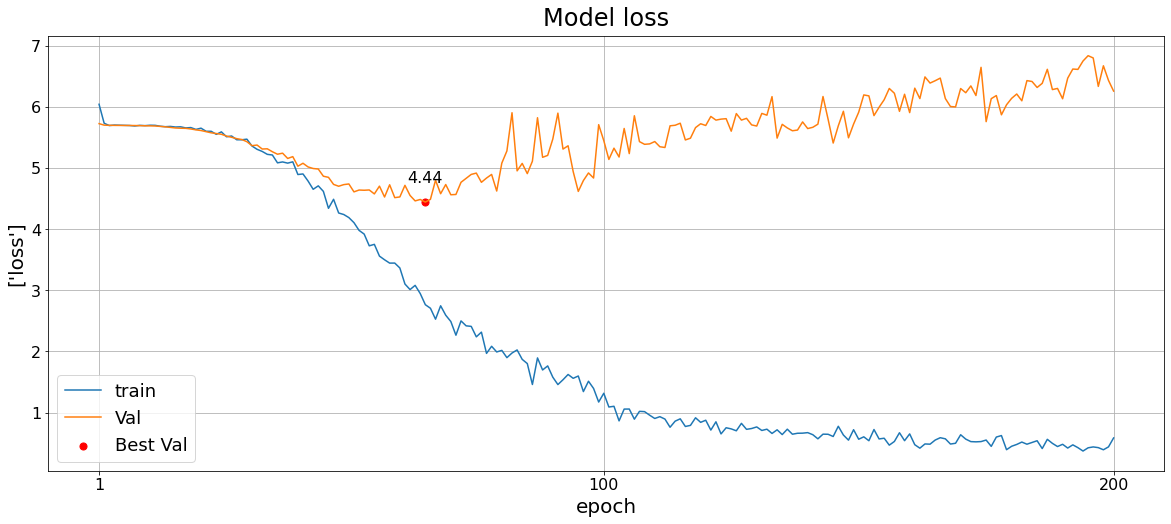

In [226]:
plot_history_metric(df, 'loss', np.argmin)

# Precision

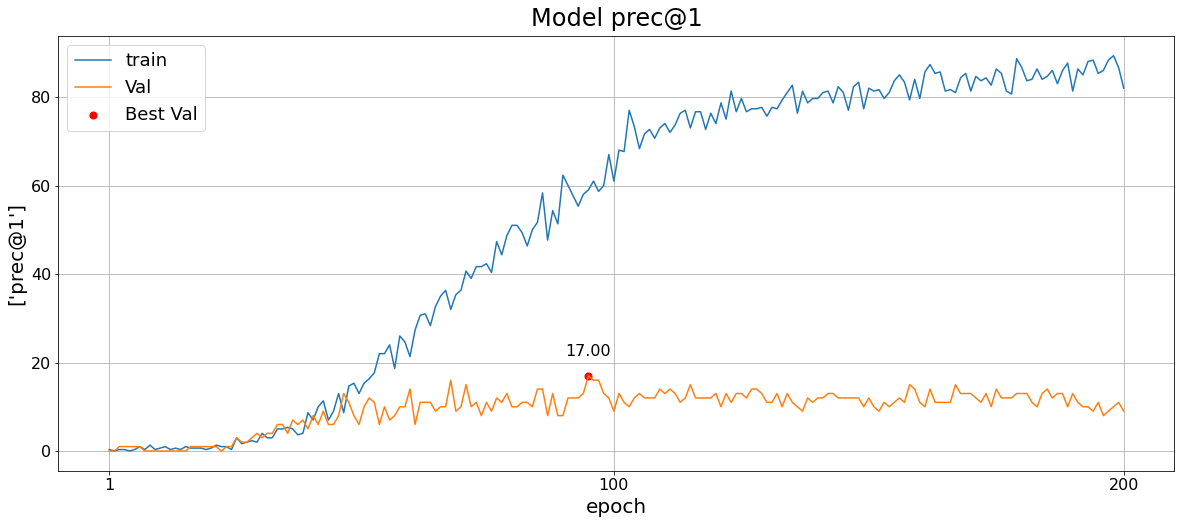

In [227]:
plot_history_metric(df, 'prec@1', np.argmax)

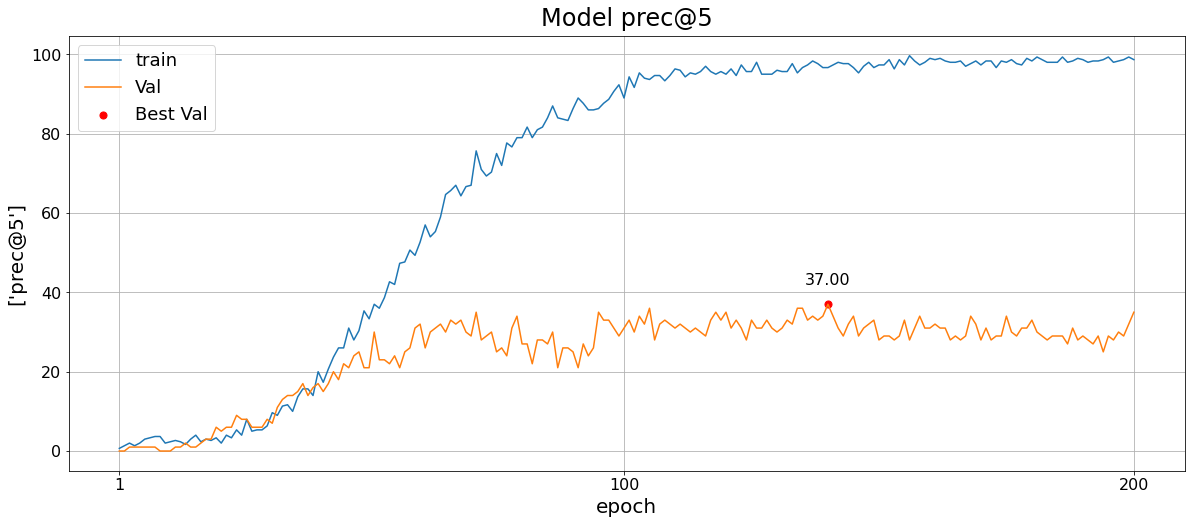

In [228]:
plot_history_metric(df, 'prec@5', np.argmax)

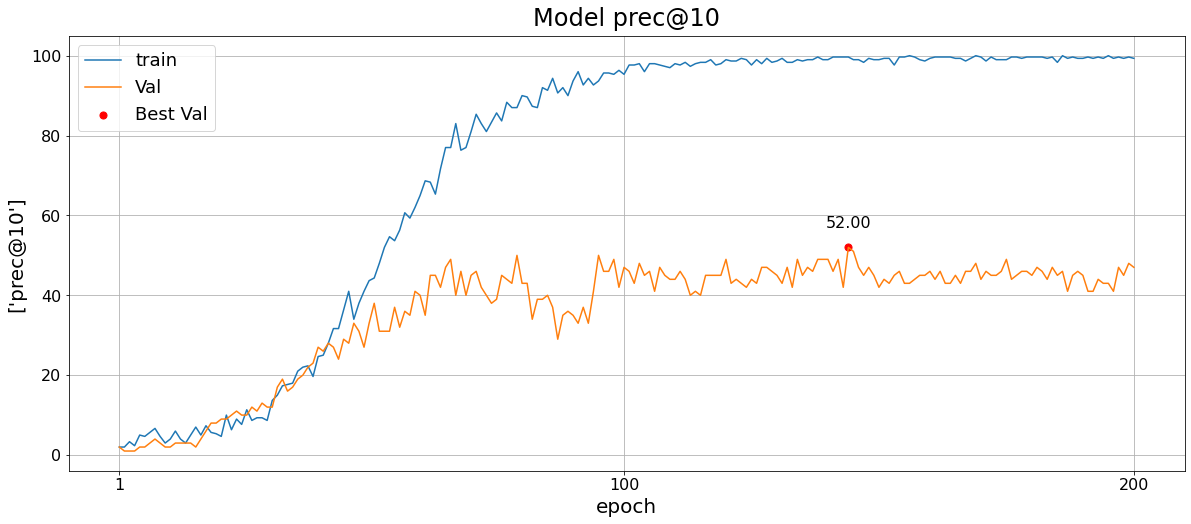

In [229]:
plot_history_metric(df, 'prec@10', np.argmax)

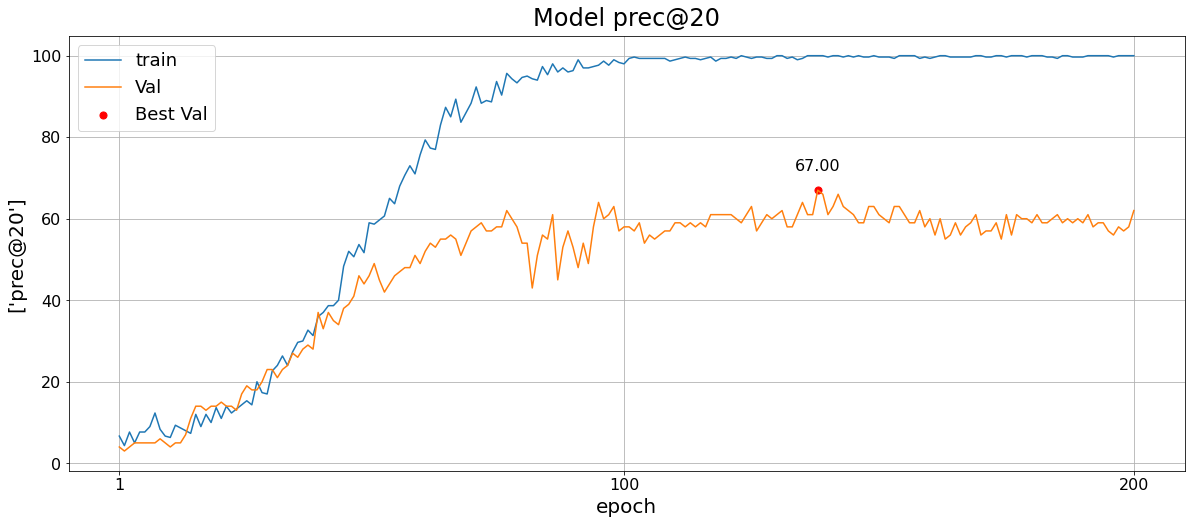

In [230]:
plot_history_metric(df, 'prec@20', np.argmax)

# NDCG

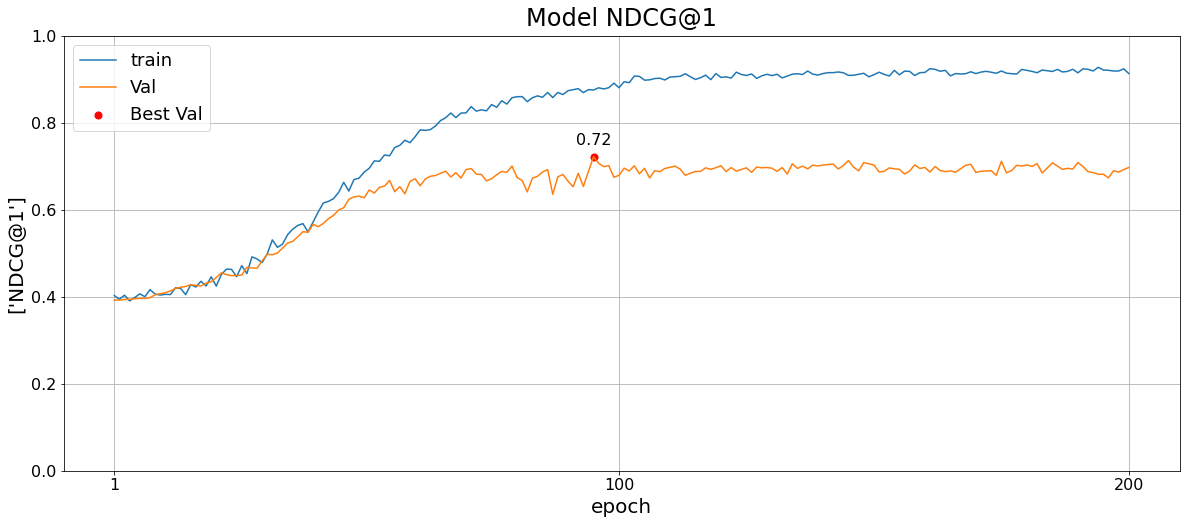

In [231]:
plot_history_metric(df, 'NDCG@1', np.argmax, yscale=(0,1))

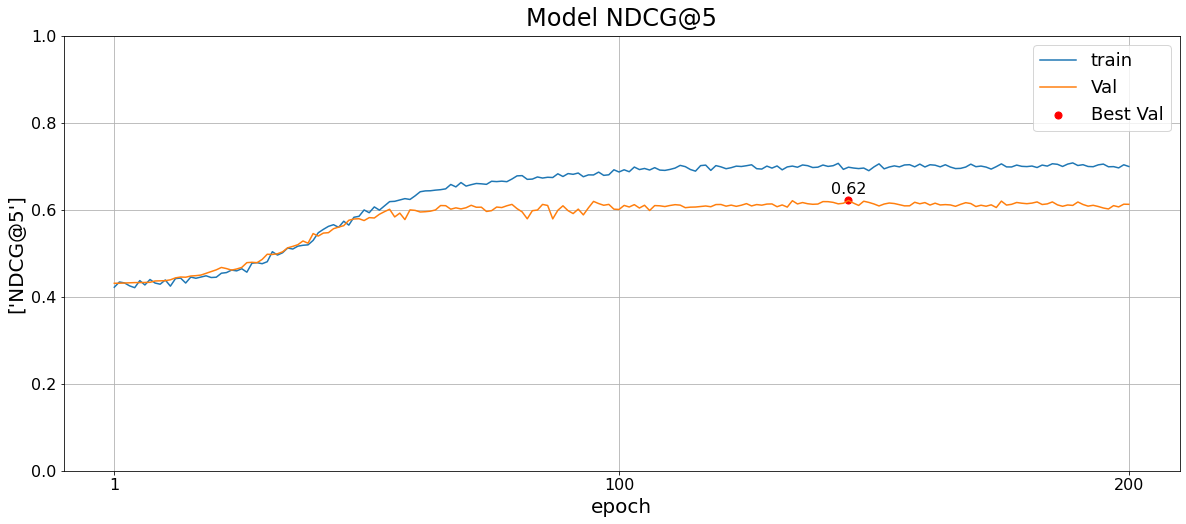

In [232]:
plot_history_metric(df, 'NDCG@5', np.argmax, yscale=(0,1))

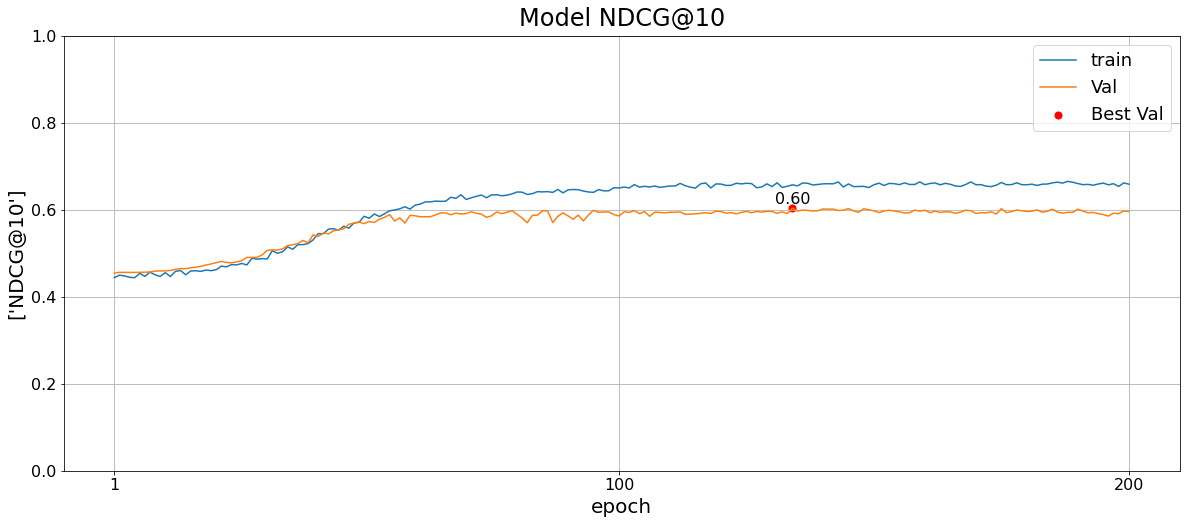

In [233]:
plot_history_metric(df, 'NDCG@10', np.argmax, yscale=(0,1))

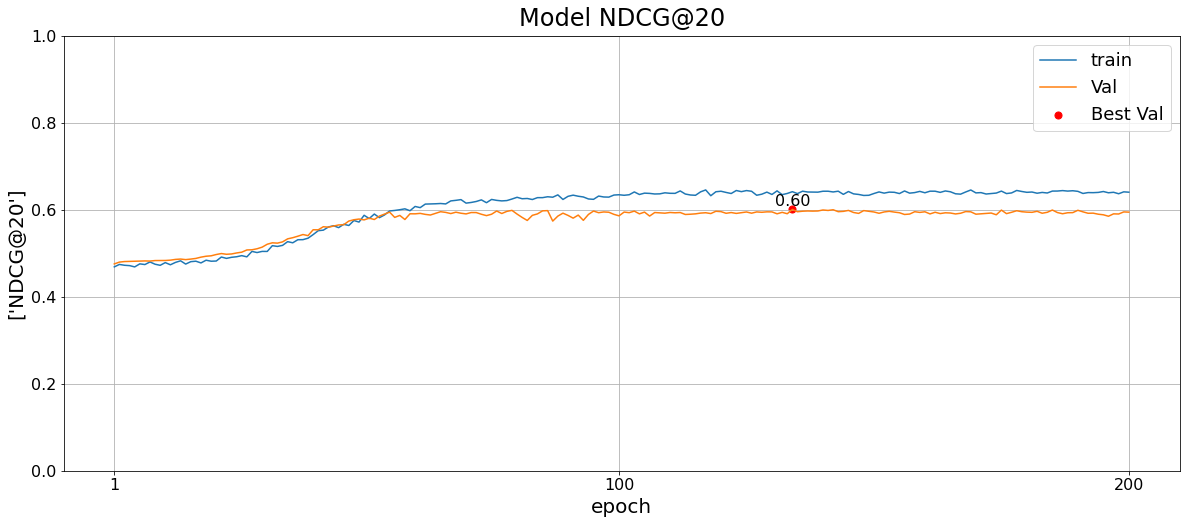

In [234]:
plot_history_metric(df, 'NDCG@20', np.argmax, yscale=(0,1))

# Category Precision

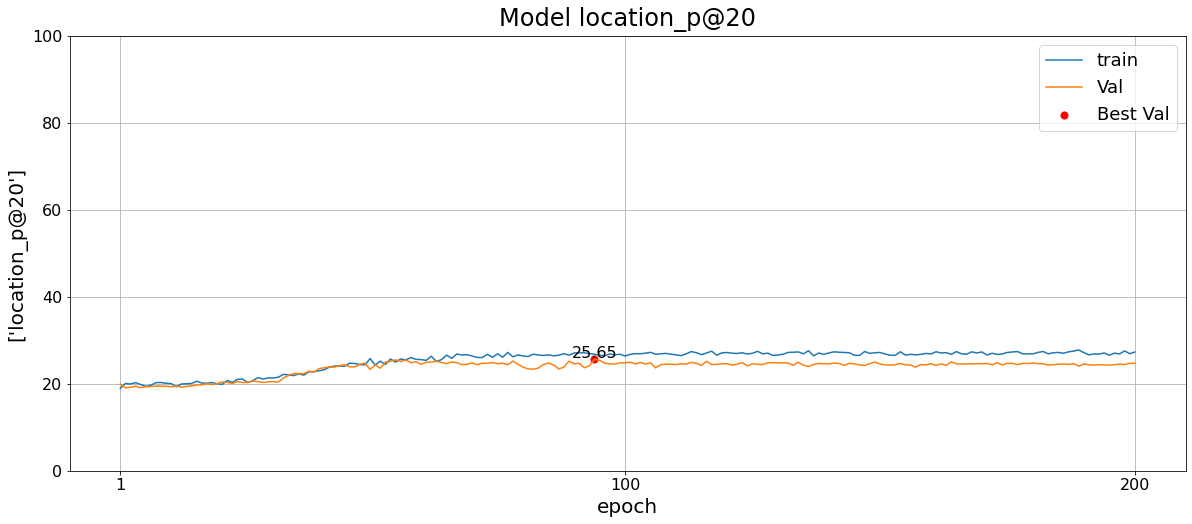

In [235]:
plot_history_metric(df, 'location_p@20', np.argmax, yscale=(0, 100))

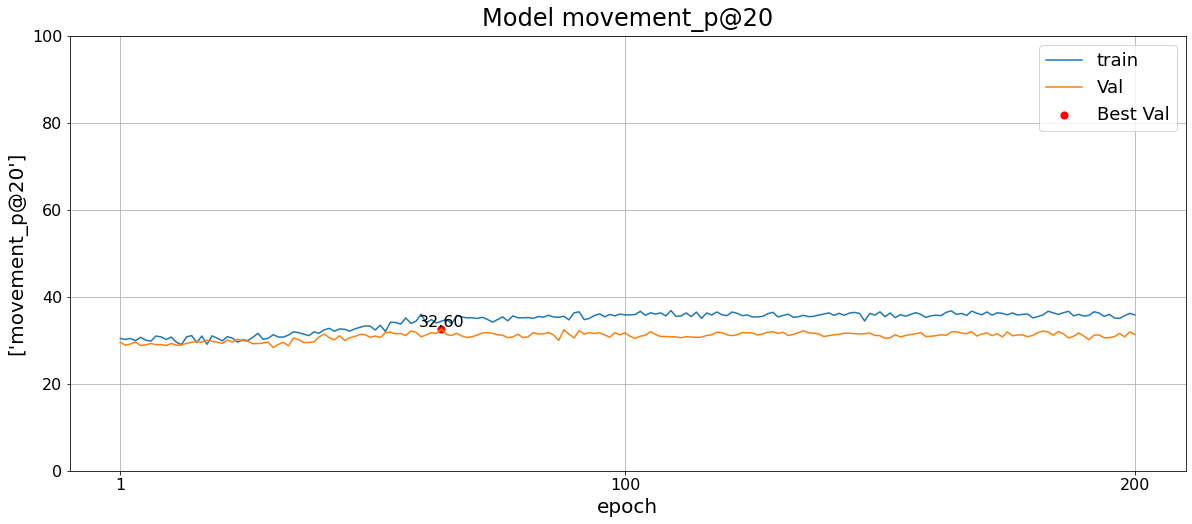

In [236]:
plot_history_metric(df, 'movement_p@20', np.argmax, yscale=(0, 100))

# NDCG Detailed

In [237]:
def get_ndcg_detailed_metrics(topk):
    return [
        f'handedness_NDCG@{topk}',
        f'location_NDCG@{topk}',
        f'movement_NDCG@{topk}',
        f'strong_hand_NDCG@{topk}',
        f'weak_hand_NDCG@{topk}',
    ]

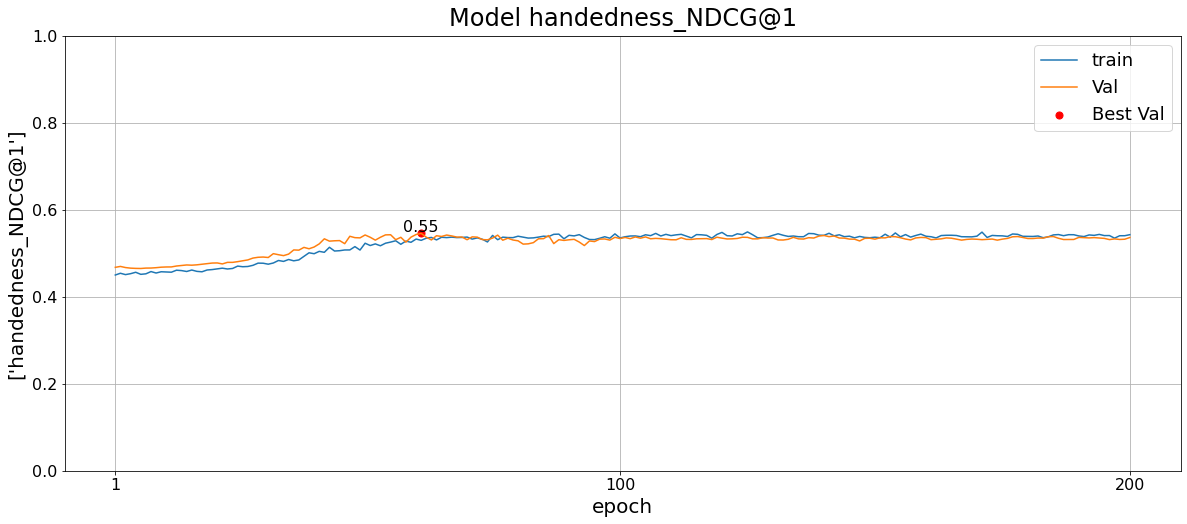

In [241]:
plot_history_metric(df, 'handedness_NDCG@1', np.argmax, yscale=(0,1))

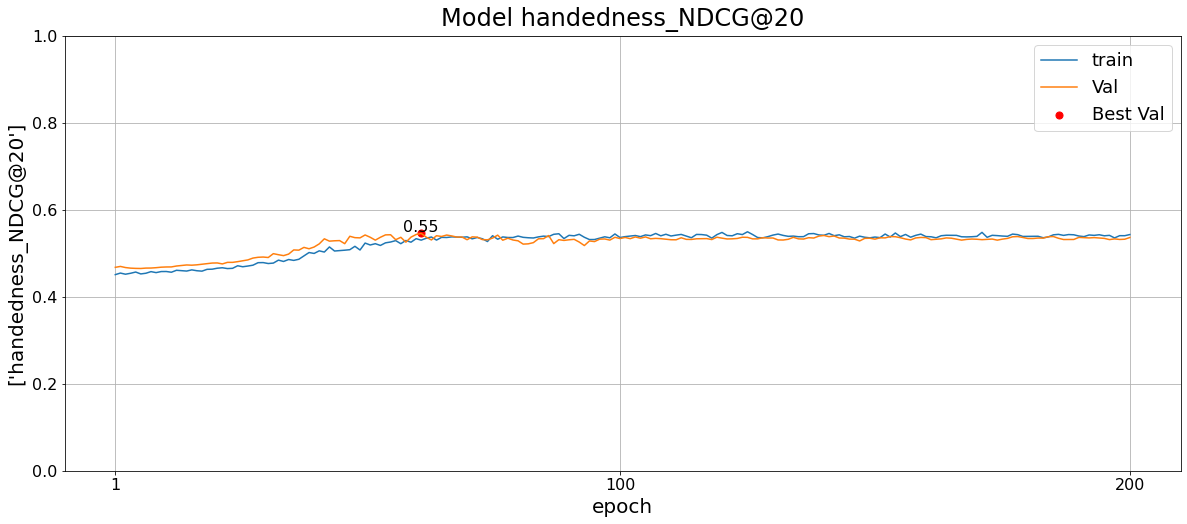

In [242]:
plot_history_metric(df, 'handedness_NDCG@20', np.argmax, yscale=(0,1))

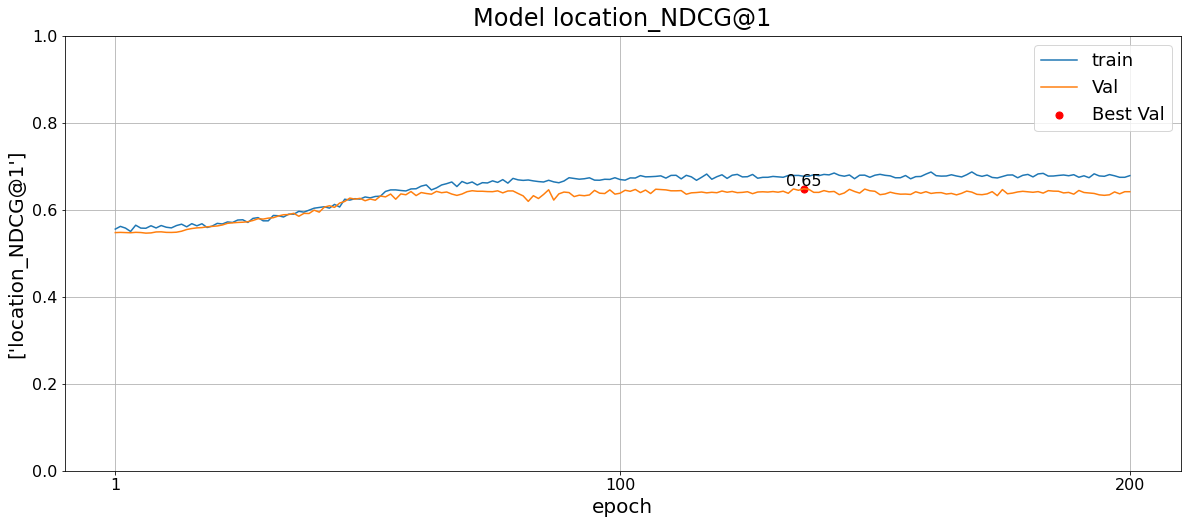

In [243]:
plot_history_metric(df, 'location_NDCG@1', np.argmax, yscale=(0,1))

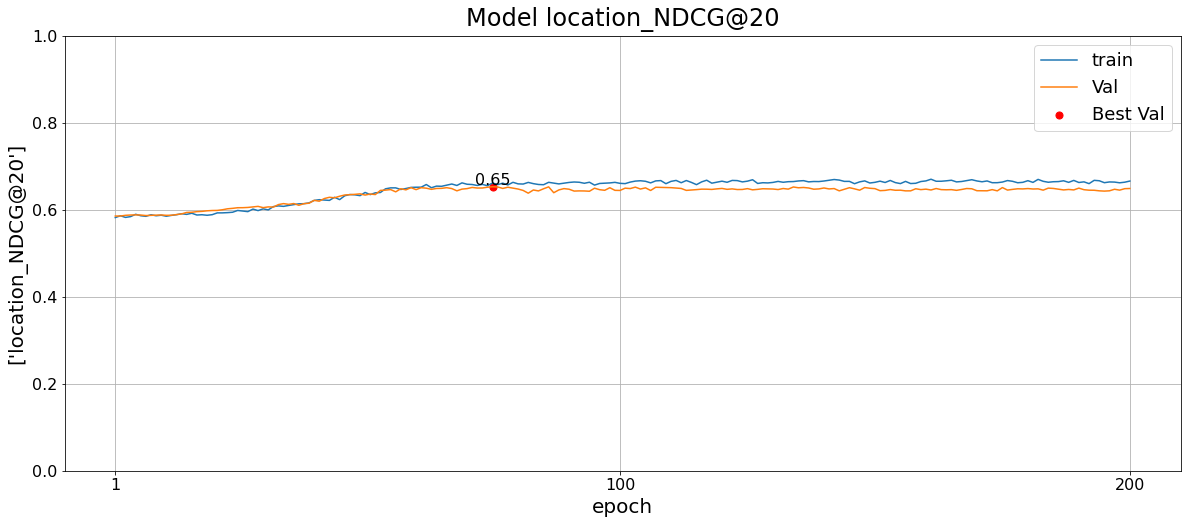

In [244]:
plot_history_metric(df, 'location_NDCG@20', np.argmax, yscale=(0,1))

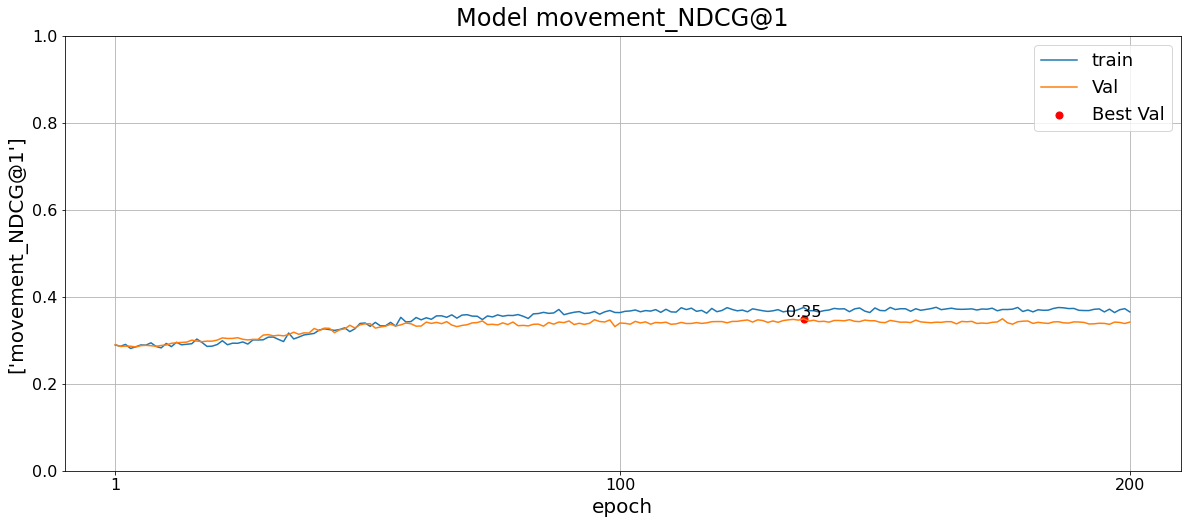

In [245]:
plot_history_metric(df, 'movement_NDCG@1', np.argmax, yscale=(0,1))

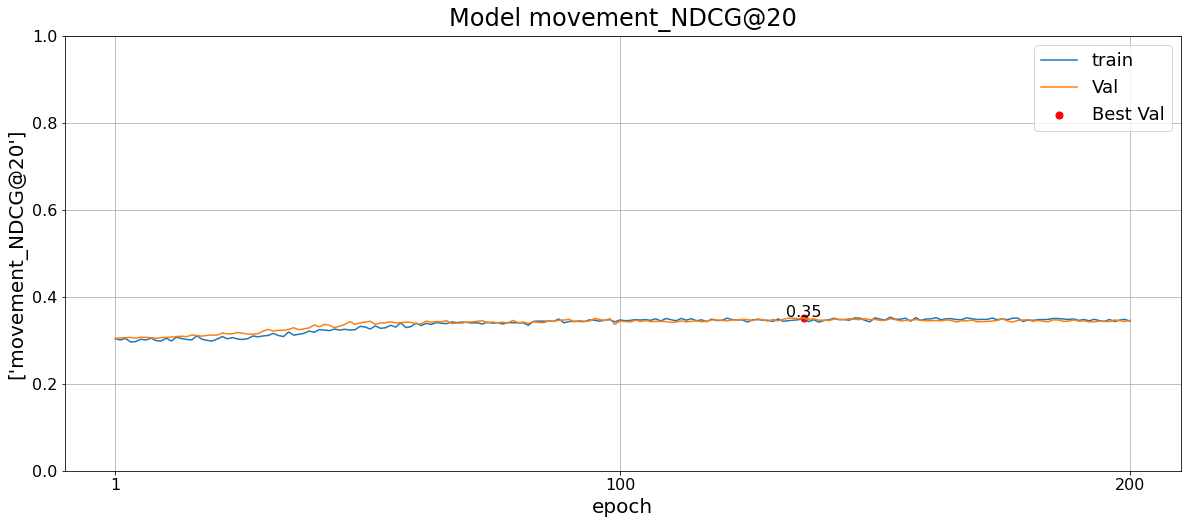

In [246]:
plot_history_metric(df, 'movement_NDCG@20', np.argmax, yscale=(0,1))

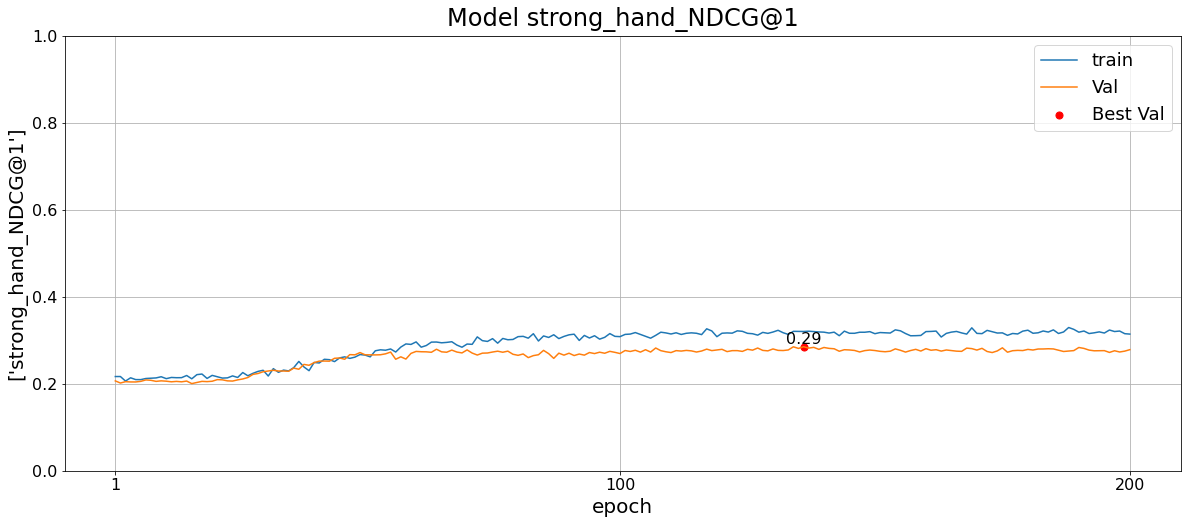

In [247]:
plot_history_metric(df, 'strong_hand_NDCG@1', np.argmax, yscale=(0,1))

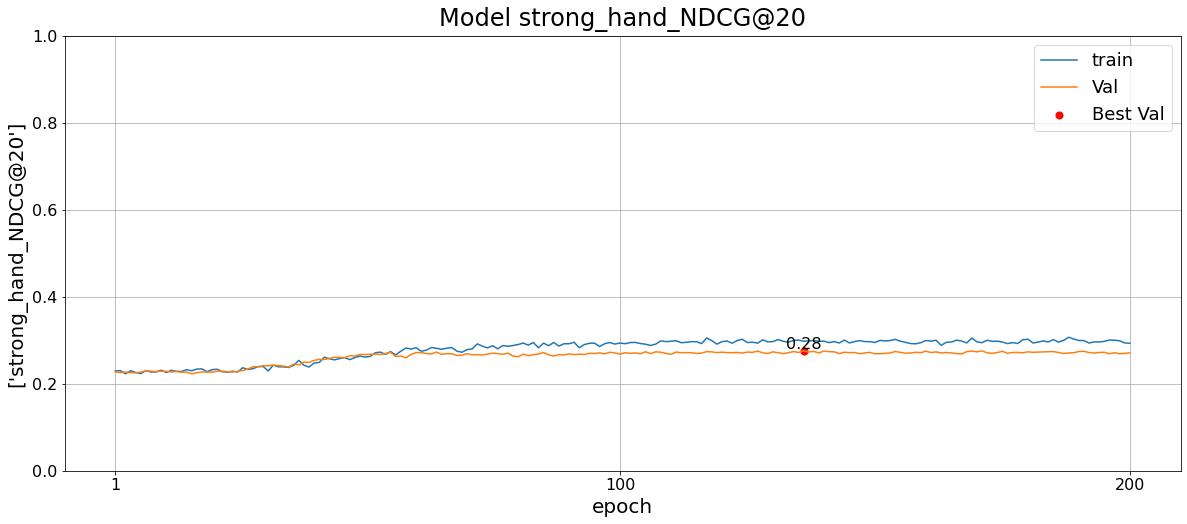

In [248]:
plot_history_metric(df, 'strong_hand_NDCG@20', np.argmax, yscale=(0,1))

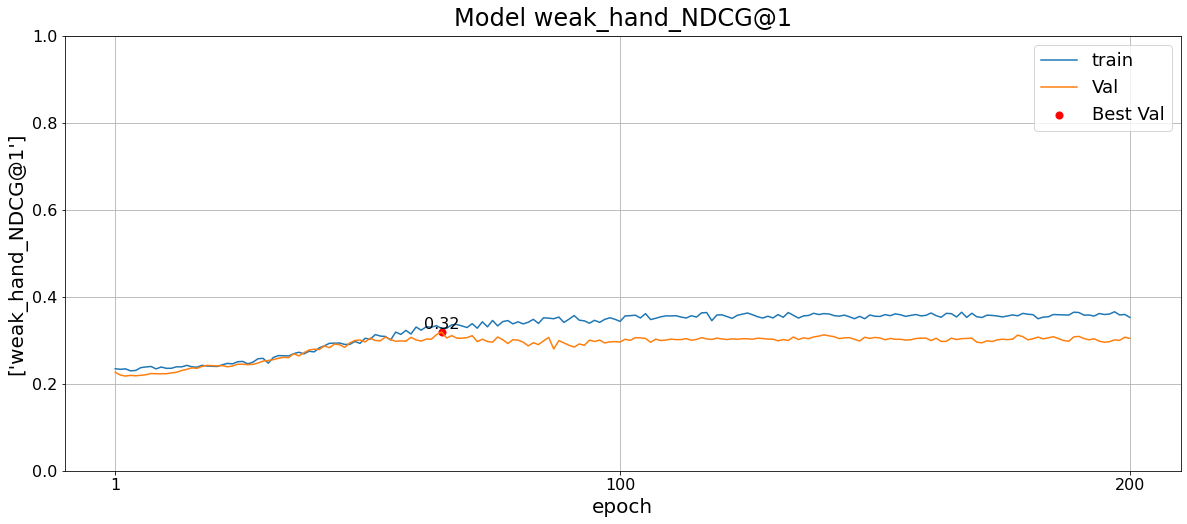

In [249]:
plot_history_metric(df, 'weak_hand_NDCG@1', np.argmax, yscale=(0,1))

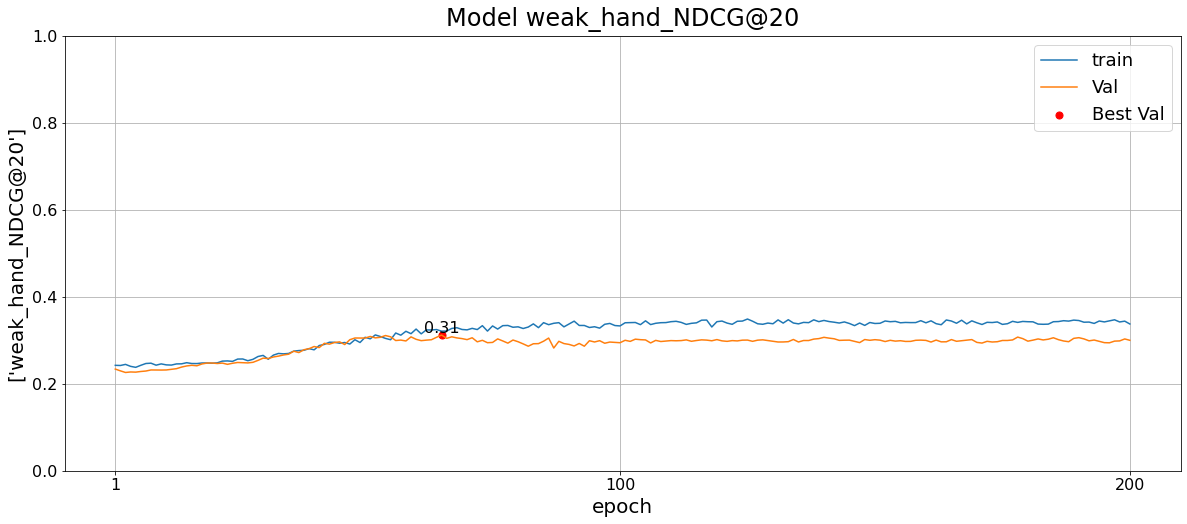

In [250]:
plot_history_metric(df, 'weak_hand_NDCG@20', np.argmax, yscale=(0,1))